In [2]:
import numpy as np
normWFs = np.load("full_data.npy")

In [3]:
from wavemap_paper.helper_functions import RAND_STATE, set_rand_state
set_rand_state(RAND_STATE)

/Users/kenjilee/Library/Caches/pypoetry/virtualenvs/star-protocol-wavemap-S8Yf6mBx-py3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from umap import umap_ as umap
reducer = umap.UMAP(random_state=RAND_STATE)
mapper = reducer.fit(normWFs)

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
import networkx as nx
G = nx.from_scipy_sparse_array(mapper.graph_)

In [6]:
import cylouvain
clustering = cylouvain.best_partition(G,resolution=2)
clustering_solution = list(clustering.values())

/Users/kenjilee/Library/Caches/pypoetry/virtualenvs/star-protocol-wavemap-S8Yf6mBx-py3.8/lib/python3.8/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


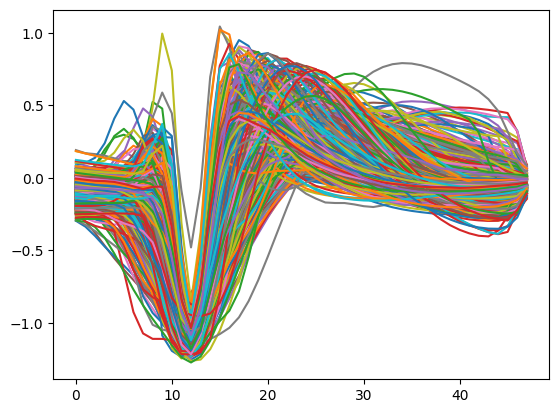

In [7]:
import matplotlib.pyplot as plt
plt.plot(normWFs.T);

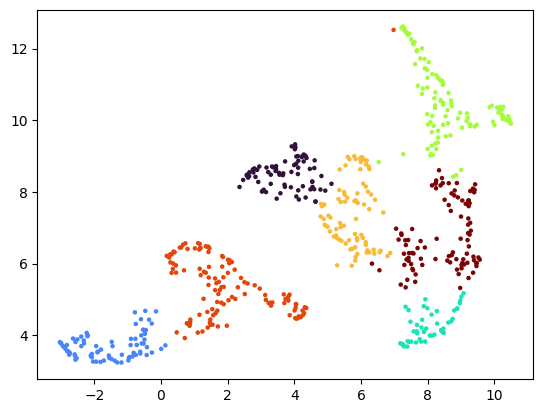

In [8]:
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt

embedding = reducer.fit_transform(normWFs)
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution
cmap = plt.get_cmap("turbo")
colors = cmap(np.linspace(0, 1, len(set(clustering_solution))))
umap_df['cluster_color'] = [colors[i] for i in clustering_solution]
plt.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o', s=5,c=umap_df['cluster_color'].tolist())

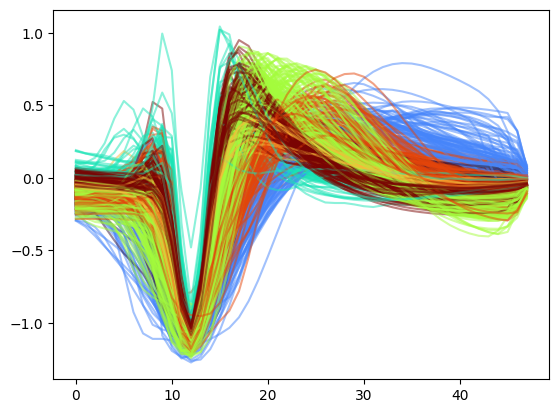

In [9]:
f,arr = plt.subplots(1)
for i,row in enumerate(umap_df['waveform'].tolist()):
    arr.plot(umap_df['waveform'].tolist()[i],c=umap_df['cluster_color'].tolist()[i],alpha=0.5)

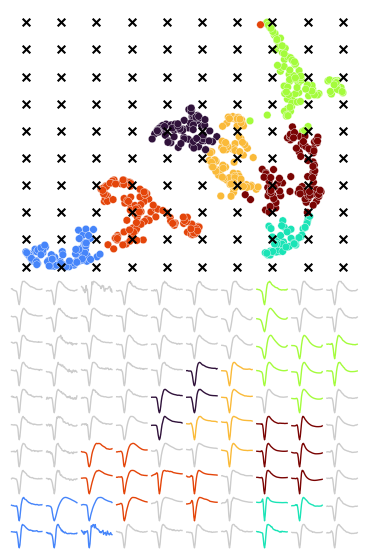

In [10]:
from wavemap_paper.helper_functions import plot_inverse_mapping
plot_inverse_mapping(reducer,umap_df)

In [11]:
from wavemap_paper.helper_functions import train_gridsearch_classifier

UMAP_model, conf_mat = train_gridsearch_classifier(umap_df)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 5/5; 1/135] START learning_rate=0.1, max_depth=3, min_child_weight=1.0, n_estimators=10, seed=42
[CV 5/5; 1/135] END learning_rate=0.1, max_depth=3, min_child_weight=1.0, n_estimators=10, seed=42;, score=0.943 total time=   0.2s
[CV 5/5; 2/135] START learning_rate=0.1, max_depth=3, min_child_weight=1.0, n_estimators=25, seed=42
[CV 5/5; 2/135] END learning_rate=0.1, max_depth=3, min_child_weight=1.0, n_estimators=25, seed=42;, score=0.954 total time=   0.4s
[CV 2/5; 4/135] START learning_rate=0.1, max_depth=3, min_child_weight=1.0, n_estimators=100, seed=42
[CV 2/5; 4/135] END learning_rate=0.1, max_depth=3, min_child_weight=1.0, n_estimators=100, seed=42;, score=0.920 total time=   1.0s
[CV 5/5; 5/135] START learning_rate=0.1, max_depth=3, min_child_weight=1.0, n_estimators=200, seed=42
[CV 5/5; 5/135] END learning_rate=0.1, max_depth=3, min_child_weight=1.0, n_estimators=200, seed=42;, score=0.966 total time=   1.7s
[

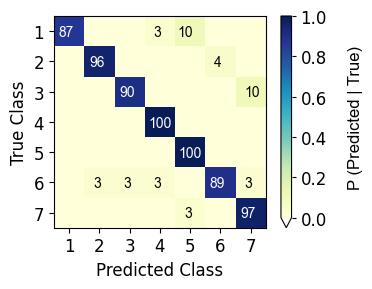

In [12]:
from wavemap_paper.helper_functions import plot_confusion_matrix
plot_confusion_matrix(conf_mat,umap_df)

In [13]:
import shap
import xgboost as xgb

xgbModel = xgb.XGBClassifier(UMAP_model.best_params_)
xgbModel.fit(umap_df['waveform'].tolist(),umap_df['cluster_id'].tolist())
explainer = shap.TreeExplainer(xgbModel)

Pass `objective` as keyword args.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


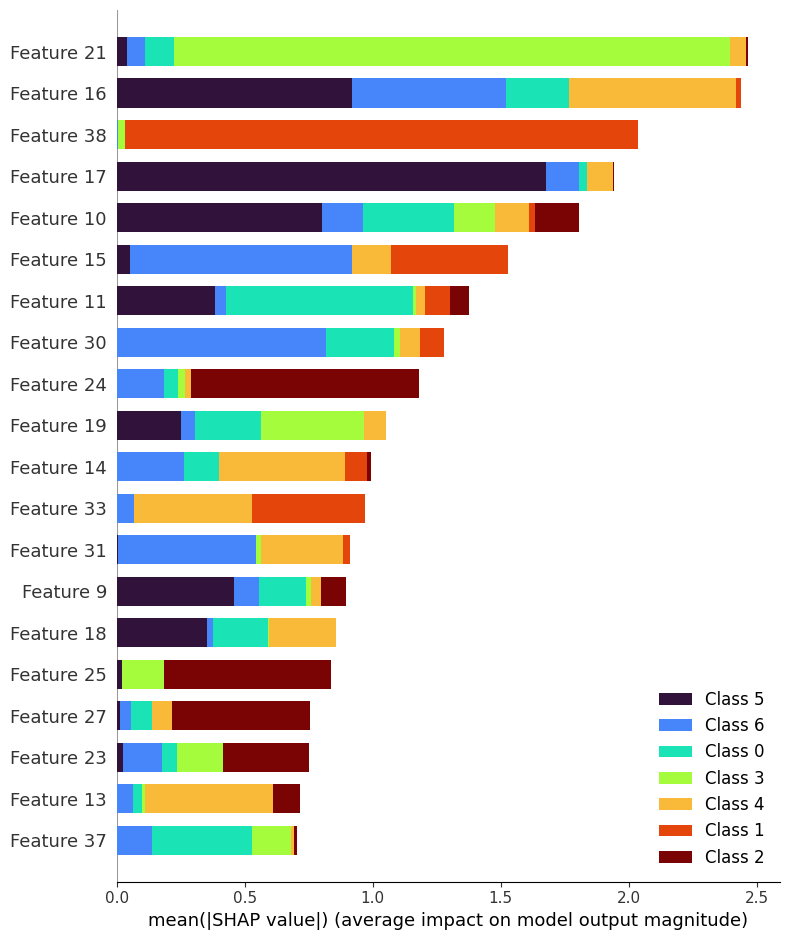

In [15]:
import matplotlib as mpl
umap_cmap = mpl.colors.ListedColormap(colors, name='umap_cmap')
shap_values = explainer.shap_values(umap_df['waveform'].tolist())
shap.summary_plot(shap_values, color = umap_cmap)

In [16]:
umap_df.to_csv('umap_df.csv')


[CV 5/5; 54/135] START learning_rate=0.3, max_depth=3, min_child_weight=2.5, n_estimators=100, seed=42
[CV 5/5; 54/135] END learning_rate=0.3, max_depth=3, min_child_weight=2.5, n_estimators=100, seed=42;, score=0.943 total time=   0.6s
[CV 2/5; 56/135] START learning_rate=0.3, max_depth=3, min_child_weight=5.0, n_estimators=10, seed=42
[CV 2/5; 56/135] END learning_rate=0.3, max_depth=3, min_child_weight=5.0, n_estimators=10, seed=42;, score=0.898 total time=   0.1s
[CV 5/5; 56/135] START learning_rate=0.3, max_depth=3, min_child_weight=5.0, n_estimators=10, seed=42
[CV 5/5; 56/135] END learning_rate=0.3, max_depth=3, min_child_weight=5.0, n_estimators=10, seed=42;, score=0.943 total time=   0.2s
[CV 3/5; 57/135] START learning_rate=0.3, max_depth=3, min_child_weight=5.0, n_estimators=25, seed=42
[CV 3/5; 57/135] END learning_rate=0.3, max_depth=3, min_child_weight=5.0, n_estimators=25, seed=42;, score=0.931 total time=   0.3s
[CV 4/5; 58/135] START learning_rate=0.3, max_depth=3, mi